# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. Implementacion de Runge Kutta de orden 4

In [ ]:
#h: paso
#n: numero de iteraciones
#t0: t inicial
#y0: valor inicial
#f: la funcion diferencial que depende de t e y
def runge_kutta_orden_4(f, y0, t0, n, h):
    tiempos = [t0]
    valores = [y0]

    for i in range(n):
        t_actual = tiempos[-1]
        y_actual = valores[-1]

        k1 = f(t_actual, y_actual)
        k2 = f(t_actual + h/2, y_actual + h*k1/2)
        k3 = f(t_actual + h/2, y_actual + h*k2/2)
        k4 = f(t_actual + h, y_actual + h*k3)

        y_next = y_actual + h * (k1 + 2*k2 + 2*k3 + k4) / 6
        t_next = t_actual + h

        tiempos.append(t_next)
        valores.append(y_next)

    return np.array(tiempos), np.array(valores)

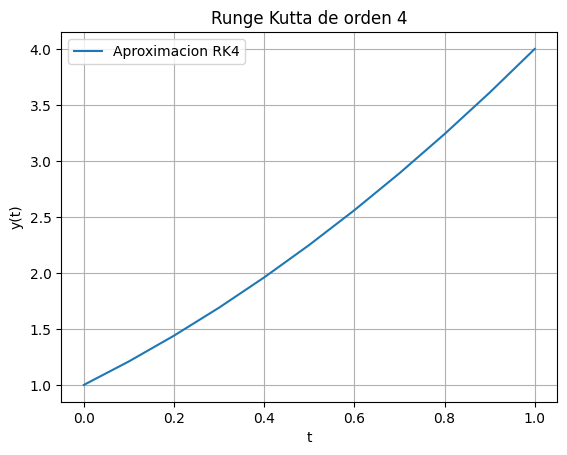

In [ ]:
#Ejemplo
def f(t, y):
    return y - t**2 + 1

t0 = 0
y0 = 1
h = 0.1
n = 10

t, y = runge_kutta_orden_4(f, y0, t0, n, h)

plt.xlabel("t")
plt.ylabel("y(t)")
plt.plot(t, y, label='Aproximacion RK4')
plt.title("Runge Kutta de orden 4")
plt.legend()
plt.grid()
plt.show()

# 2. Diseño de trayectorias

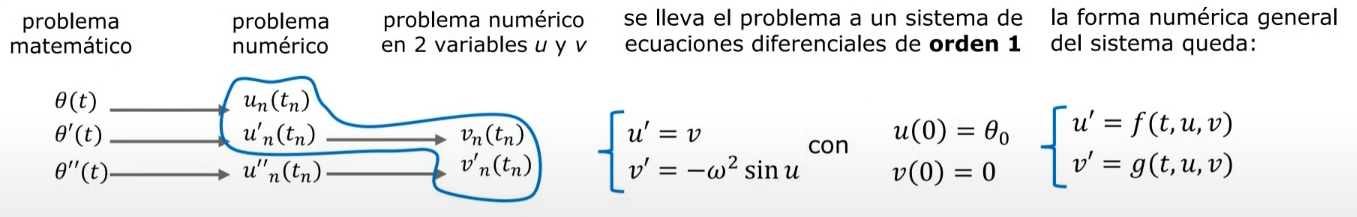

## Valores de aceleracion y radio de la trayectoria en la curva

In [ ]:
aceleracion_en_curva = 10
radio = 5

## Funcion difetencial f de la curva

In [ ]:
# Recibe:
#   t: tiempo actual
#   y: es un array donde la primera pos es la posicion angular,
#   y la segunda pos es la velocidad angular
# Devuelve un vector, en la primera pos devuelve la velocidad angular en t,
# y en la segunda pos devuelve la aceleracion angular en t
def f_curva(t, y):
    theta1, theta2 = y  # y[0] es la posicion angular
    # e y[1] es la velocidad angular
    dtheta1_dt = theta2  # derivada de la posicion es la velocidad angular
    dtheta2_dt = -(aceleracion_en_curva / radio) * np.sin(theta1)
    # Aceleración angular, usando las constantes
    return np.array([dtheta1_dt, dtheta2_dt])

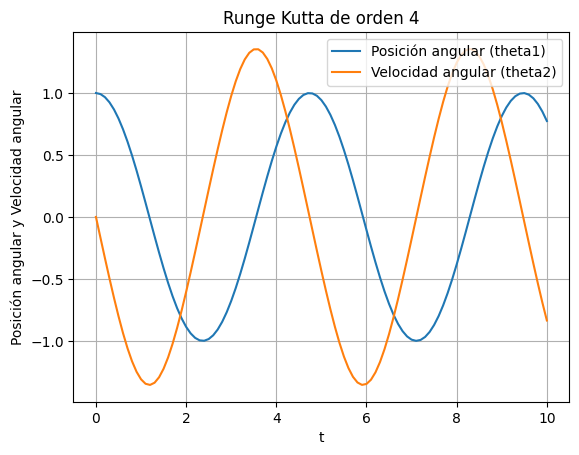

In [ ]:
#Ejemplo del RK4 de la funcion de la trayectoria en una curva
t0 = 0
y0 = np.array([1, 0])  # Inicializa con pos angular 1 y velocidad angular 0
h = 0.1
n = 100

# Ejecutar el metodo RK
t, y = runge_kutta_orden_4(f_curva, y0, t0, n, h)

# Graficar
plt.xlabel("t")
plt.ylabel("Posición angular y Velocidad angular")
plt.plot(t, y[:, 0], label="Posición angular (theta1)")
plt.plot(t, y[:, 1], label="Velocidad angular (theta2)")
plt.title("Runge Kutta de orden 4")
plt.legend()
plt.grid()
plt.show()

## Valores de la trayectoria recta

In [ ]:
m = 800
aceleracion_recta = 5

## Funcion diferencial f de la la trayectoria recta

In [ ]:
#Porque F depende de t???
def f_fuerza(t):
    return m * aceleracion_recta

In [ ]:
# Recibe:
#   t: tiempo actual
#   y: es un array donde la primera pos es la posicion,
#   y la segunda pos la velocidad

# Devuelve un vector, en la primera pos devuelve la velocidad en t,
#   y en la segunda pos devuelve la aceleracion en t
def f_recto(t, y):
    x, v = y
    a = (f_fuerza(t) / m)
    return np.array([v, a])

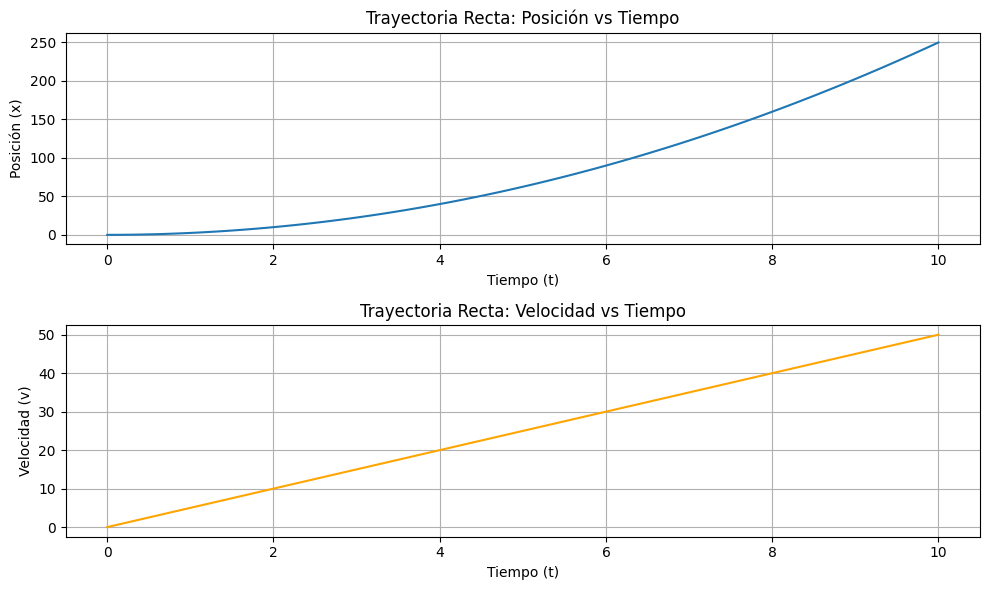

In [ ]:
#Ejemplo
t0 = 0
y0 = np.array([0, 0])
h = 0.1
n = 100

# RK
t, y = runge_kutta_orden_4(f_recto, y0, t0, n, h)

# Graficar los resultados
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, y[:, 0], label="Posición (x)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Posición (x)")
plt.title("Trayectoria Recta: Posición vs Tiempo")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, y[:, 1], label="Velocidad (v)", color="orange")
plt.xlabel("Tiempo (t)")
plt.ylabel("Velocidad (v)")
plt.title("Trayectoria Recta: Velocidad vs Tiempo")
plt.grid(True)

plt.tight_layout()
plt.show()

# Trayectoria

# Datos iniciales del circuito

In [ ]:
# Definimos datos iniciales de la S de Senna
straight_lengths = [63.54, 164.16, 70.64]
curve_radii = [17.46, 154.50]
curve_angles = [107, 16.7]
v_initial = 305 / 3.6

# Función para calcular la trayectoria en base a los datos iniciales

In [ ]:
# Definimos una función que calcule la trayectoria según el tipo de segmento
def calculate_trajectory(
    straight_lengths,
    curve_radii,
    curve_angles,
    v_initial,
    h=0.05,
    n_steps_straight=50,
    n_steps_curve=30
):
    t_total = []
    y_total = []
    last_state = np.array([0, v_initial])

    for i in range(len(straight_lengths) + len(curve_radii)):
        if i % 2 == 0:
            t0_straight = t_total[-1] if t_total else 0
            y0_straight = last_state

            t_straight, y_straight = runge_kutta_orden_4(
                f_recto,
                y0_straight,
                t0_straight,
                n_steps_straight,
                h,
            )

            t_total.extend(t_straight[1:])
            y_total.extend(y_straight[1:])
            last_state = y_straight[-1]

        else:
            t0_curve = t_total[-1]
            theta0_curve = 0
            omega0_curve = 0
            y0_curve = np.array([theta0_curve, omega0_curve])

            t_curve, y_curve = runge_kutta_orden_4(
                f_curva,
                y0_curve,
                t0_curve,
                n_steps_curve,
                h,
            )

            t_total.extend(t_curve[1:])
            y_total.extend(y_curve[1:])
            last_state = y_curve[-1]

    return np.array(t_total), np.array(y_total)

In [ ]:
# Calculamos la trayectoria con los datos iniciales
t_trajectory, y_trajectory = calculate_trajectory(
    straight_lengths,
    curve_radii,
    curve_angles,
    v_initial
)

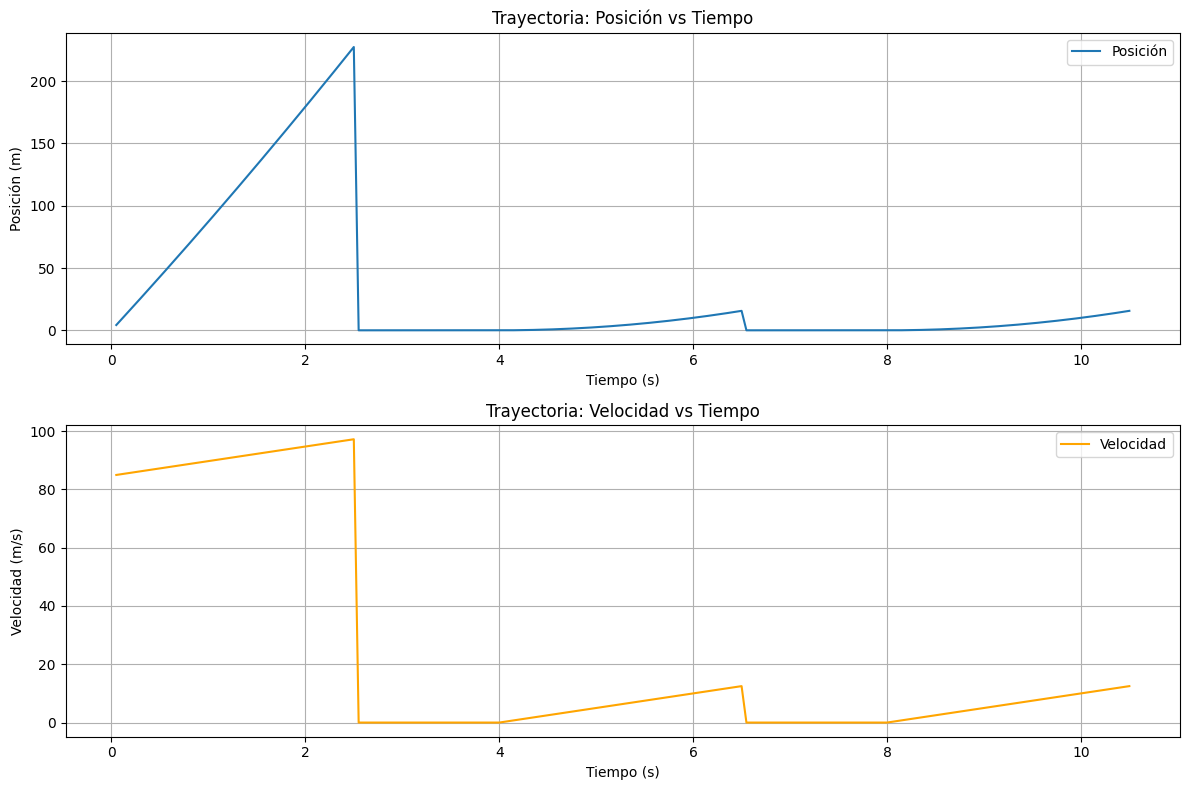

Tiempo total de recorrido: 10.50 s
Posición final: 15.63 m
Velocidad final: 12.50 m/s


In [ ]:
# Graficar la trayectoria completa
plt.figure(figsize=(12, 8))

# Subplot 1: Posición
plt.subplot(2, 1, 1)
plt.plot(t_trajectory, y_trajectory[:, 0], label="Posición")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Trayectoria: Posición vs Tiempo")
plt.grid(True)
plt.legend()

# Subplot 2: Velocidad
plt.subplot(2, 1, 2)
plt.plot(t_trajectory, y_trajectory[:, 1], label="Velocidad", color='orange')
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Trayectoria: Velocidad vs Tiempo")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Información adicional sobre la trayectoria
print(f"Tiempo total de recorrido: {t_trajectory[-1]:.2f} s")
print(f"Posición final: {y_trajectory[-1, 0]:.2f} m")
print(f"Velocidad final: {y_trajectory[-1, 1]:.2f} m/s")
